In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [2]:
record_list = ["P0.0078125s", "P0.015625s", "P0.03125s", "P0.0625s", "P0.125s", "P0.25s", "P0.5s", "P1s_5", "P2s", "P4s", "P8s", "P16s", "P32s", "P64s", "P128s"]
period_list = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]
frequency_list = [1/period for period in period_list]
names = ["20230829_bode", "20230830_bode", "20230901_bode"]
importlib.reload(bc)

manip = []
for i, name in enumerate(names):
    manip.append(bc.BodeClass_PSI(name, time_start= 30.045, windowing= None, pic_search_window= 10, median_filtering_window_size = 0, phase_threshold=1000))

15

Text(0, 0.5, 'Fluo (r.u.)')

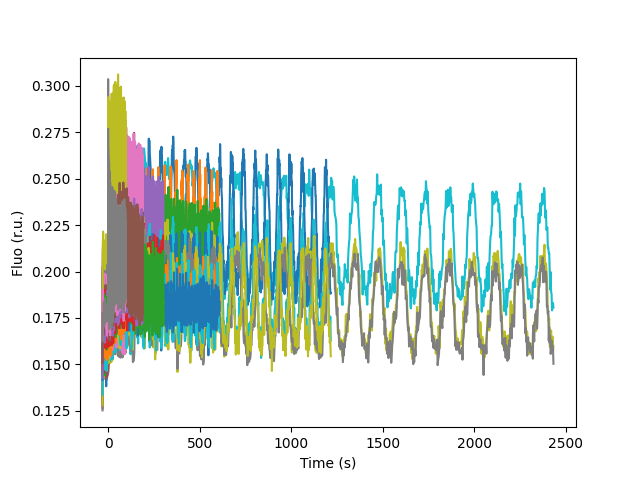

In [14]:
fig,ax = plt.subplots()
for experiment in manip:
    for i in range(len(experiment.clean_times)):
        ax.plot(experiment.clean_times[i]-30, experiment.clean_data[i])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluo (r.u.)")

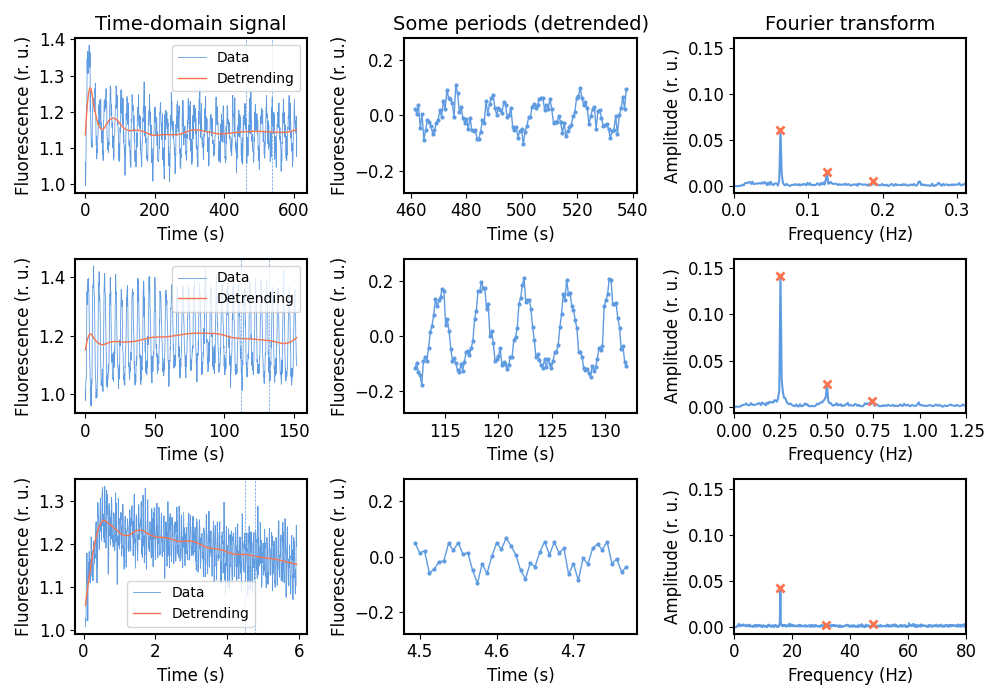

In [5]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/20230926_IBPC_ENS_Ladi/"
orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]
light_blue = [0.37254902, 0.60784314, 0.88235294]

repeat = 1
bode_object = manip[repeat]
frequency_list = [0.0625, 0.25, 16]
nb_periods = [5, 5, 5]
period_to_start = [30, 28, 79]

fig, ax = plt.subplots(3,3, figsize = (10,7))

for i, freq in enumerate(frequency_list):
    index = bode_object.frequency_list.index(freq)
    ax[i,0].plot(bode_object.bode_times[index]-30, bode_object.bode_data[index], color = light_blue, linewidth = 0.6, label = "Data")
    ax[i,0].plot(bode_object.bode_times[index]-30, bode_object.detrend_fit[index], color = orange, linewidth = 1, label = "Detrending")
    start = period_to_start[i]*int(1/freq*bode_object.sample_rate[index])
    end = start + nb_periods[i]*int(1/freq*bode_object.sample_rate[index])
    ax[i, 0].axvline(bode_object.bode_times[index][start]-30, linestyle = "--", linewidth = 0.5, color = light_blue)
    ax[i, 0].axvline(bode_object.bode_times[index][end]-30, linestyle = "--", linewidth = 0.5, color = light_blue)
    
    ax[i, 1].set_ylim(-0.28, 0.28)
    ax[i, 2].set_ylim(-0.007, 0.16)
    ax[i, 0] = tools.poster_axes(ax[i, 0], title = None, xlabel = "Time (s)", ylabel = "Fluorescence (r. u.)", labelsize= 12)
    ax[i, 1] = tools.poster_axes(ax[i, 1], title = None, xlabel = "Time (s)", ylabel = "Fluorescence (r. u.)", labelsize= 12, legend = False)
    ax[i, 2] = tools.poster_axes(ax[i, 2], title = None, xlabel = "Frequency (Hz)", ylabel = "Amplitude (r. u.)", labelsize= 12, legend = False)
    

    
    ax[i, 1].plot(bode_object.bode_times[index][start:end]-30, bode_object.signal[index][start:end], 'o-', color = light_blue, linewidth = 1, markersize = 2)
    
    ax[i, 2].plot(bode_object.fft_freq[index], bode_object.fft_amp[index], color = light_blue, linewidth = 1.5)
    ax[i, 2].set_xlim(0, freq*5)
    for j in range(3):
            ax[i, 2].plot(np.array(bode_object.harmonics[f'f_{j}'])[index], np.array(bode_object.harmonics[f'A_{j}'])[index], "x", markersize=6, markeredgewidth=2, color = orange)

ax[0,0].set_title("Time-domain signal", fontsize = 14)
ax[0,1].set_title("Some periods (detrended)", fontsize = 14)
ax[0,2].set_title("Fourier transform", fontsize = 14)
fig.tight_layout()
fig.savefig(f"{folder}/bode_signal_fluo.png", dpi=300)

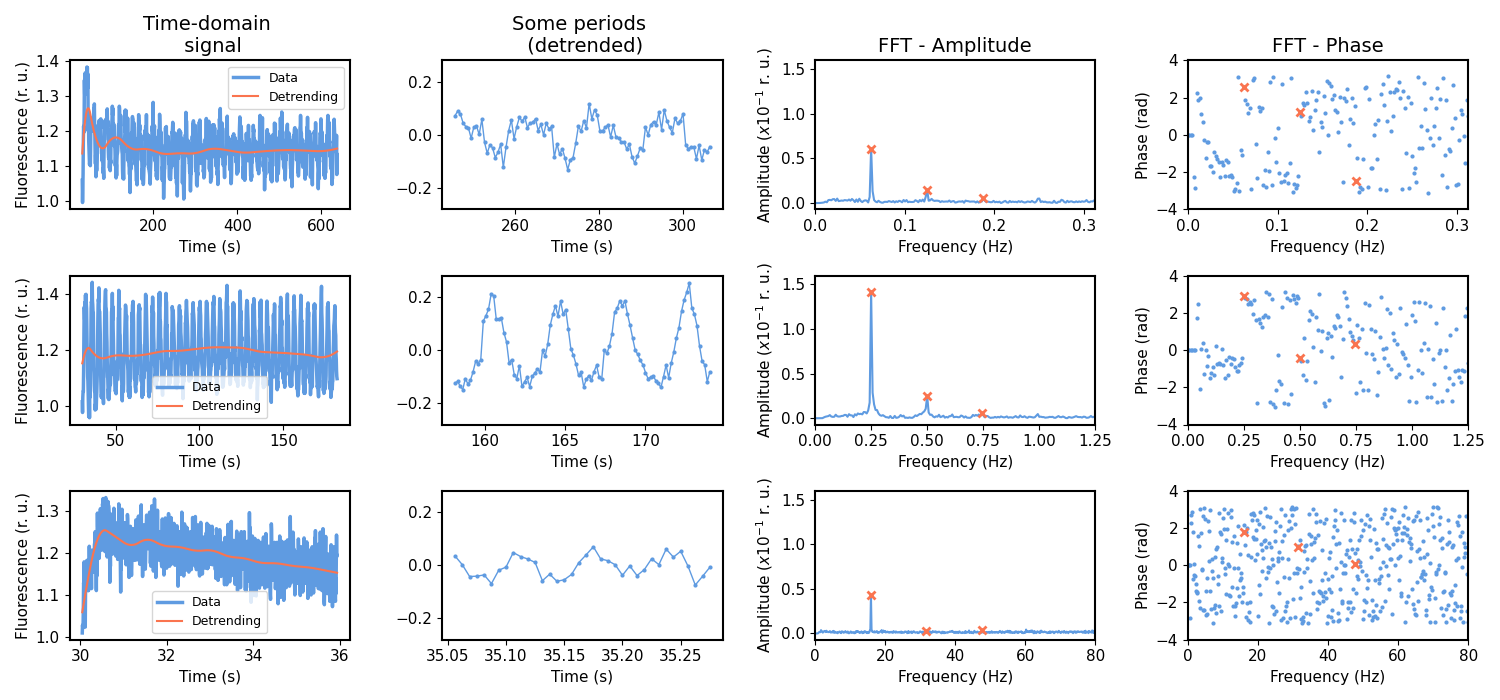

In [6]:
orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]
light_blue = [0.37254902, 0.60784314, 0.88235294]

repeat = 1
bode_object = manip[repeat]
frequency_list = [0.0625, 0.25, 16]
nb_periods = [4, 4, 4]
period_to_start = [14, 32, 89]

fig, ax = plt.subplots(3,4, figsize = (15,7))

for i, freq in enumerate(frequency_list):
    index = bode_object.frequency_list.index(freq)
    ax[i,0].plot(bode_object.bode_times[index], bode_object.bode_data[index], color = light_blue, linewidth = 2.5, label = "Data")
    ax[i,0].plot(bode_object.bode_times[index], bode_object.detrend_fit[index], color = orange, linewidth = 1.5, label = "Detrending")
    start = period_to_start[i]*int(1/freq*bode_object.sample_rate[index])
    end = start + nb_periods[i]*int(1/freq*bode_object.sample_rate[index])
    
    ax[i, 1].set_ylim(-0.28, 0.28)
    ax[i, 2].set_ylim(-0.07, 1.6)
    ax[i, 3].set_ylim(-4, 4)
    ax[i, 0] = tools.poster_axes(ax[i, 0], title = None, xlabel = "Time (s)", ylabel = "Fluorescence (r. u.)", labelsize= 11, legendfontsize= 9)
    ax[i, 1] = tools.poster_axes(ax[i, 1], title = None, xlabel = "Time (s)", ylabel = None, labelsize= 11, legend = False)
    ax[i, 2] = tools.poster_axes(ax[i, 2], title = None, xlabel = "Frequency (Hz)", ylabel = "Amplitude ($x10^{-1}$ r. u.)", labelsize= 11, legend = False)
    ax[i, 3] = tools.poster_axes(ax[i, 3], title = None, xlabel = "Frequency (Hz)", ylabel = "Phase (rad)", labelsize= 11, legend = False)
    

    
    ax[i, 1].plot(bode_object.bode_times[index][start:end], bode_object.signal[index][start:end], 'o-', color = light_blue, linewidth = 1, markersize = 2)
    
    ax[i, 2].plot(bode_object.fft_freq[index], bode_object.fft_amp[index]*10, color = light_blue, linewidth = 1.5)
    ax[i, 2].set_xlim(0, freq*5)
    ax[i, 3].plot(bode_object.fft_freq[index], np.deg2rad(bode_object.fft_phase[index]), 'o', color = light_blue, linewidth = 1.5, markersize = 2)
    ax[i, 3].set_xlim(0, freq*5)
    for j in range(3):
            ax[i, 2].plot(np.array(bode_object.harmonics[f'f_{j}'])[index], np.array(bode_object.harmonics[f'A_{j}'])[index]*10, "x", markersize=6, markeredgewidth=2, color = orange)
            ax[i, 3].plot(np.array(bode_object.harmonics[f'f_{j}'])[index], np.deg2rad(np.array(bode_object.harmonics[f'P_{j}'])[index]), "x", markersize=6, markeredgewidth=2, color = orange)
            

    
 
ax[0,0].set_title("Time-domain \n signal", fontsize = 14)
ax[0,1].set_title("Some periods \n (detrended)", fontsize = 14)
ax[0,2].set_title("FFT - Amplitude", fontsize = 14)
ax[0,3].set_title("FFT - Phase", fontsize = 14)
fig.tight_layout()
plt.subplots_adjust(wspace=0.33)
fig.savefig(f"{folder}/bode_signal_fluo.png", dpi=300)

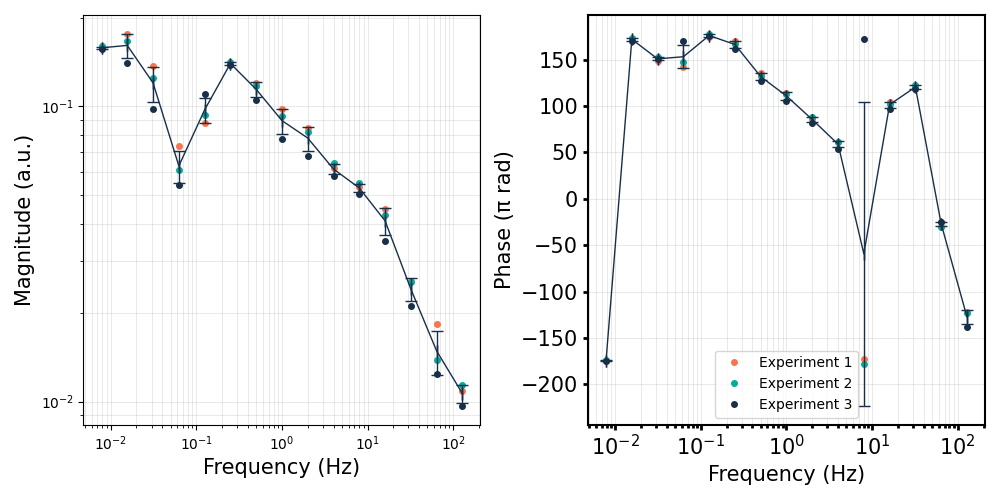

In [7]:
line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]


colors = [orange, green, blue]

frequencies = []
amplitudes = []
phases = []

for replicate in manip:
    frequencies.append(replicate.harmonics.f_input[::-1])
    amplitudes.append(replicate.harmonics[f'A_{0}'][::-1])
    #phases.append(np.unwrap(np.deg2rad(replicate.harmonics[f'P_{0}'])[::-1] + np.pi))
    phases.append(replicate.harmonics[f'P_{0}'][::-1])
    
avg_freq = np.mean(frequencies, axis = 0)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)
avg_phase = np.mean(phases, axis = 0)
std_phase = np.std(phases, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig_title = "Bode plot of the fundamental harmonic"

for i in range(len(names)):
    ax[0].plot(frequencies[i], amplitudes[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
    ax[1].plot(frequencies[i], phases[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
ax[0].errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_amp, capsize=4, color = blue)
ax[1].errorbar(avg_freq, avg_phase, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_phase, capsize=4, color = blue)

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])



fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates_amp.png", dpi=300)


In [8]:
manip[0].harmonics

,f_input,A_0,f_0,P_0,A_1,f_1,P_1,A_2,f_2,P_2
0,128.000000,0.010871,127.578154,-121.602956,0.003326,252.289383,-100.738300,0.002414,378.434074,-107.880232
0,64.000000,0.018319,63.861171,-25.372225,0.001950,131.887202,-102.629272,0.002605,184.642082,-47.336883
0,32.000000,0.025560,31.794872,120.406094,0.003534,64.273504,170.970218,0.002441,98.461538,-1.728120
0,16.000000,0.045049,15.949099,104.765335,0.002025,31.219512,67.149846,0.001941,48.016967,-28.383726
0,8.000000,0.053196,7.940866,-172.450212,0.002780,15.966209,133.904966,0.002412,23.569166,-78.167611
0,4.000000,0.061648,4.004215,61.147480,0.005033,7.966280,-156.971626,0.002165,11.591149,69.561262
0,2.000000,0.084348,2.000000,86.333976,0.013474,3.978947,-53.532895,0.004883,5.915789,112.618909
0,1.000000,0.098213,1.000000,113.873714,0.020762,1.989474,28.716017,0.005413,2.989474,131.210446
0,0.500000,0.120078,0.500000,135.776534,0.024453,0.994737,82.115677,0.002966,1.447368,31.923082
0,0.250000,0.138717,0.250000,169.953222,0.016433,0.500000,-25.179059,0.005612,0.743421,96.330412


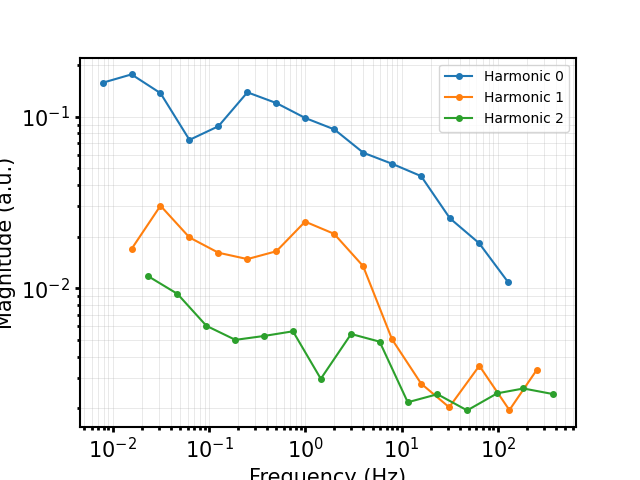

In [9]:
fig, ax = plt.subplots()
for harmonic, i in enumerate(range(3)):
    ax.plot(manip[0].harmonics[f'f_{i}'], manip[0].harmonics[f'A_{i}'], "o-", markersize=4, label = f"Harmonic {i}")
    ax = tools.bode_plot_axes(ax)
ax.legend()

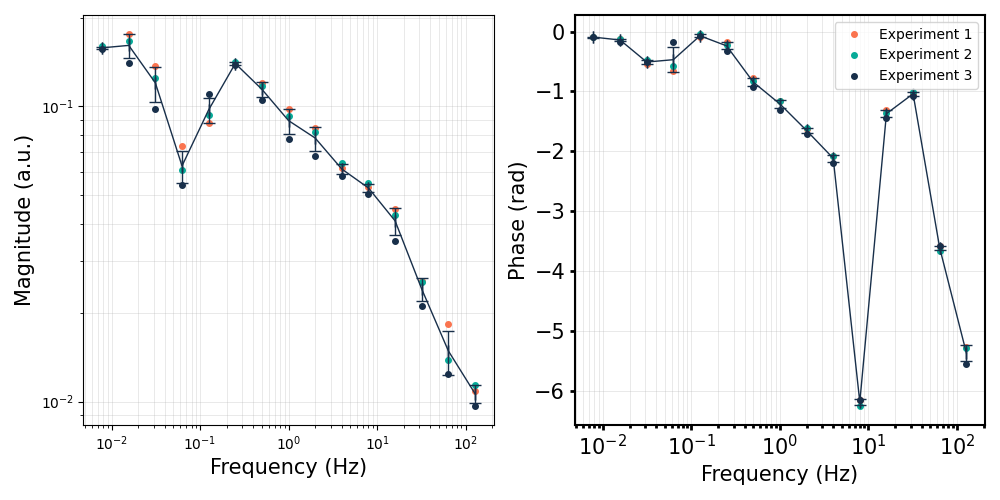

In [10]:
line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]


colors = [orange, green, blue]

frequencies = []
amplitudes = []
phases = []

for replicate in manip:
    frequencies.append(replicate.harmonics.f_input[::-1].values)
    amplitudes.append(replicate.harmonics[f'A_{0}'][::-1].values)
    phases.append(np.deg2rad(replicate.harmonics[f'P_{0}'][::-1]).values)

##### manually correct phases ######
for i in range(3):
    phases[i][0] = - phases[i][0]

phases[2][10] = - phases[2][10]

for i in range(3):
    phases[i] = phases[i] - np.pi
    
avg_freq = np.mean(frequencies, axis = 0)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)
avg_phase = np.mean(phases, axis = 0)
std_phase = np.std(phases, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig_title = "Bode plot of the fundamental harmonic"

for i in range(len(names)):
    ax[0].plot(frequencies[i], amplitudes[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
    ax[1].plot(frequencies[i], phases[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
ax[0].errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_amp, capsize=4, color = blue)
ax[1].errorbar(avg_freq, avg_phase, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_phase, capsize=4, color = blue)

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])
ax[1].set_ylabel("Phase (rad)")



fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates_phase.png", dpi=300)


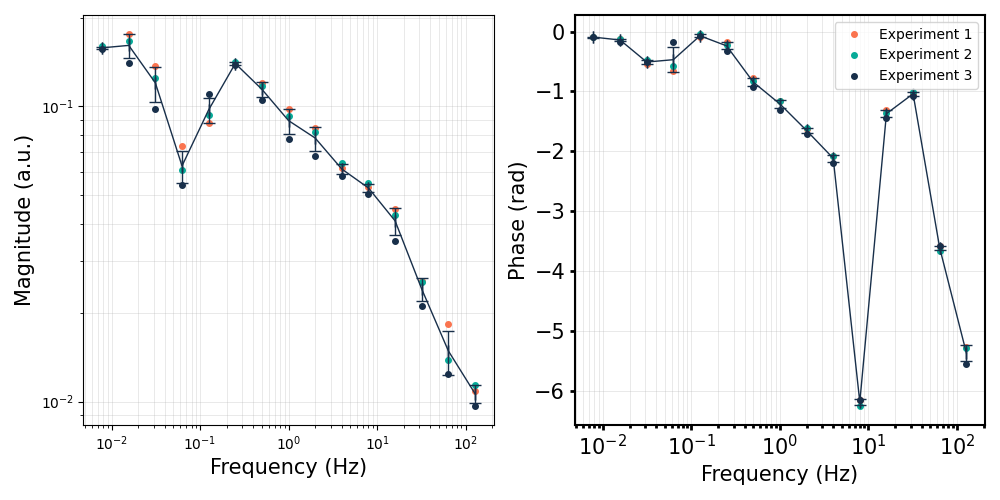

In [11]:
line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]


colors = [orange, green, blue]

frequencies = []
amplitudes = []
phases = []

for replicate in manip:
    frequencies.append(replicate.harmonics.f_input[::-1].values)
    amplitudes.append(replicate.harmonics[f'A_{0}'][::-1].values)
    phases.append(np.deg2rad(replicate.harmonics[f'P_{0}'][::-1]).values)

##### manually correct phases ######
for i in range(3):
    phases[i][0] = - phases[i][0]

phases[2][10] = - phases[2][10]

for i in range(3):
    phases[i] = phases[i] - np.pi
    
avg_freq = np.mean(frequencies, axis = 0)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)
avg_phase = np.mean(phases, axis = 0)
std_phase = np.std(phases, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig_title = "Bode plot of the fundamental harmonic"

for i in range(len(names)):
    ax[0].plot(frequencies[i], amplitudes[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
    ax[1].plot(frequencies[i], phases[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
ax[0].errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_amp, capsize=4, color = blue)
ax[1].errorbar(avg_freq, avg_phase, xerr=std_freq, fmt ='', linestyle = '-', linewidth = 1, yerr=std_phase, capsize=4, color = blue)

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])
ax[1].set_ylabel("Phase (rad)")



fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates_phase.png", dpi=300)


NameError: name 'harmonics' is not defined

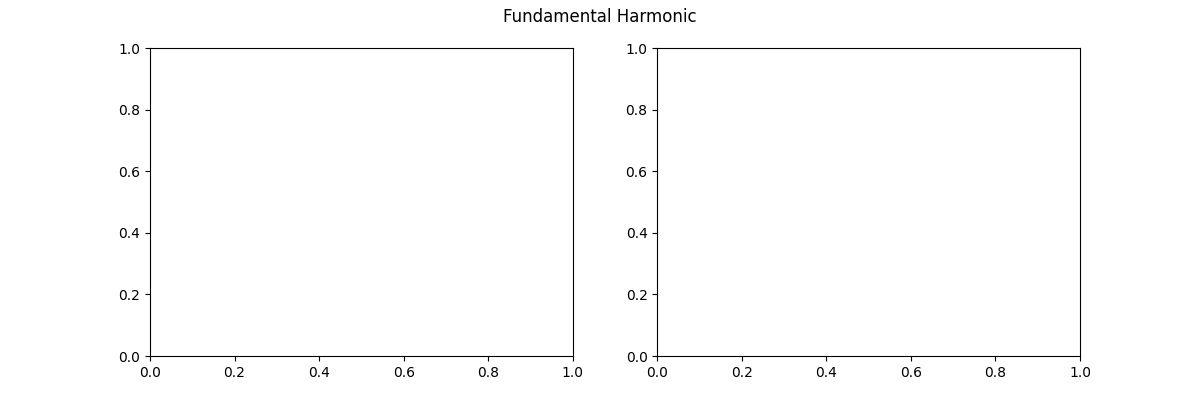

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
fig.suptitle("Fundamental Harmonic")
ax[0].plot(harmonics["f_input"], harmonics["A_0"], 'o-', label = "Fundamental", markersize = 8, linewidth = 1)
ax[0].plot(harmonics["f_input"], harmonics["A_1"], 'o-', label = "2nd Harmonic", markersize = 8, linewidth = 1)
ax[1].plot(harmonics["f_input"], harmonics["P_0"], 'o-', label = "Fundamental", markersize = 8, linewidth = 1)
ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])
fig.tight_layout()
fig.savefig(fig_folder + "bode_fund.png")

In [ ]:
phases[0]

array([-3.05806863,  3.01217231,  2.60089444,  2.47932247,  3.04511905,
        2.96624329,  2.36974756,  1.98747124,  1.50681213,  1.06722486,
       -3.009824  ,  1.82850005,  2.10148278, -0.44282886, -2.12237197])

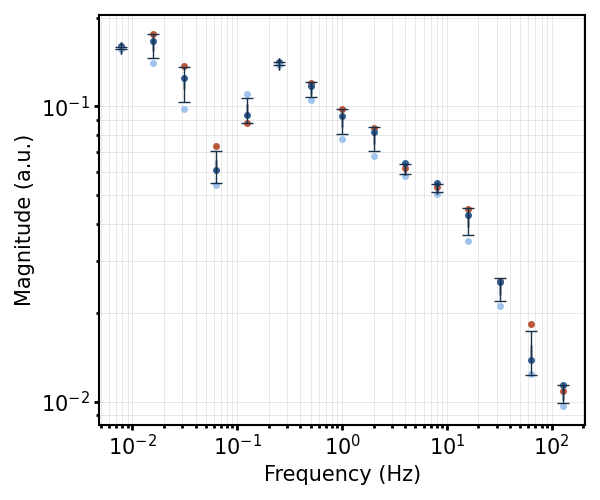

In [13]:
line = 2.5
marker = 4

orange = [250/255, 116/255, 79/255]
green = [7/255, 171/255, 152/255]
blue = [24/255, 47/255, 74/255]

colors = dc.get_random_colors(len(names))

frequencies = []
amplitudes = []

for replicate in manip:
    frequencies.append(replicate.harmonics.f_input)
    amplitudes.append(replicate.harmonics[f'A_{0}'])
    
avg_freq = np.mean(frequencies, axis = 0)
avg_amp = np.mean(amplitudes, axis = 0)
std_freq = np.std(frequencies, axis = 0)
std_amp = np.std(amplitudes, axis = 0)

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"

for i in range(len(names)):
    ax.plot(frequencies[i], amplitudes[i], "o", markersize=marker, color = colors[i], label = f"Experiment {i+1}")
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='', linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue)

ax = tools.bode_plot_axes(ax)

#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()

fig.savefig(f"{manip[-1].fig_folder}/bode_replicates_amp.png", dpi=300)

In [14]:
folder = manip[-1].fig_folder
save_bode = {"Frequency": frequency_list, "Amplitude": avg_amp, "Std": std_amp}
save_bode = pd.DataFrame(save_bode)
save_bode.to_csv(f"{folder}/bode_PSI_data.csv", index=False)

ValueError: All arrays must be of the same length

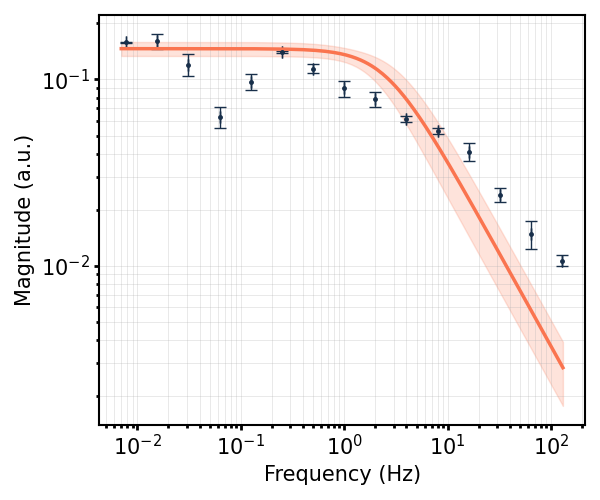

In [15]:
marker = 2.5

fig, ax = plt.subplots(figsize=(6,5))
fig_title = "Bode plot of the fundamental harmonic"
ax.errorbar(avg_freq, avg_amp, xerr=std_freq, fmt ='o', markersize = marker, linestyle = '', linewidth = 1, yerr=std_amp, capsize=4, color = blue, label = "Experimental data")
ax = tools.plot_model(ax, "RC", avg_freq, avg_amp, sigma = std_amp)
#ax = tools.plot_model(ax, "sec_ord", avg_freq, avg_amp, sigma = std_amp, p0 = fit_params)

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()
fig.savefig(f"{manip[-1].fig_folder}/bode_model.png", dpi=300)

IndexError: list index out of range

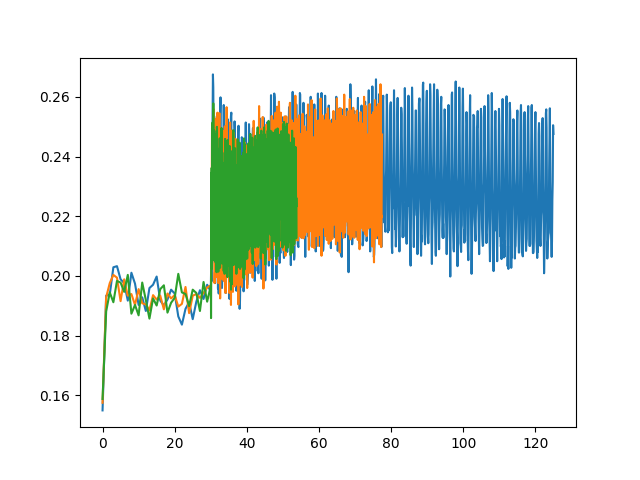

In [16]:
fig, ax = plt.subplots()
F_stat_norm = []

for repeat in manip:
    aux = np.empty((1,0))
    for record in record_list:
        index = record_list.index(record)
        ax.plot(repeat.clean_times[index], repeat.clean_data[index],label = f"{frequency_list[index]} Hz")
        aux = np.append(aux, repeat.clean_data[index][9:30])
    F_stat_norm.append(np.mean(aux, axis = 0)) 
    